In [2]:
import sys

package_path: str = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
from roi_rectangle import RoiRectangle

from src.config.config import load_config

In [7]:
run_n: int = 
config = load_config()
npz_file = os.path.join(
    config.path.processed_dir,
    f"run={run_n:04}_scan=0001.npz"
)
images = np.load(npz_file)['poff']
print(f"{images.shape = }")
print(f"{images.mean() = }")
print(f"{images.min() = }")
print(f"{images.max() = }")

images.shape = (81, 514, 1030)
images.mean() = 0.1013146
images.min() = -1.0483413
images.max() = 16.618326


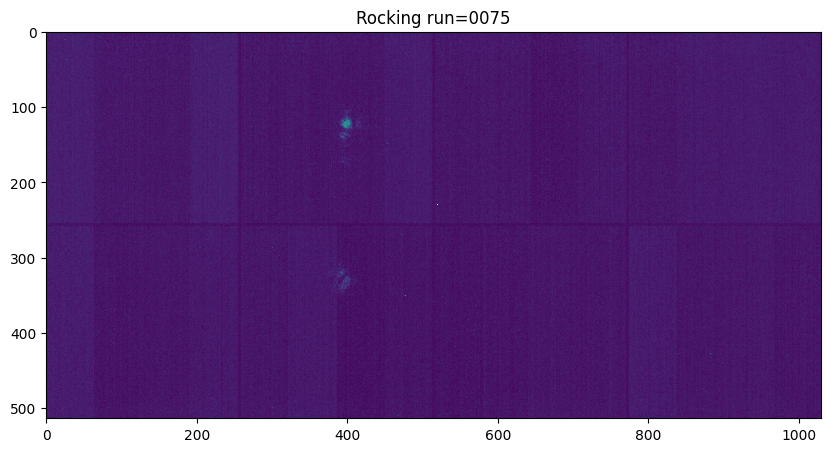

In [18]:
images = np.maximum(images, 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(images[40]), vmin=0, vmax=1.5)
ax.set_title(f"Rocking run={run_n:04}");

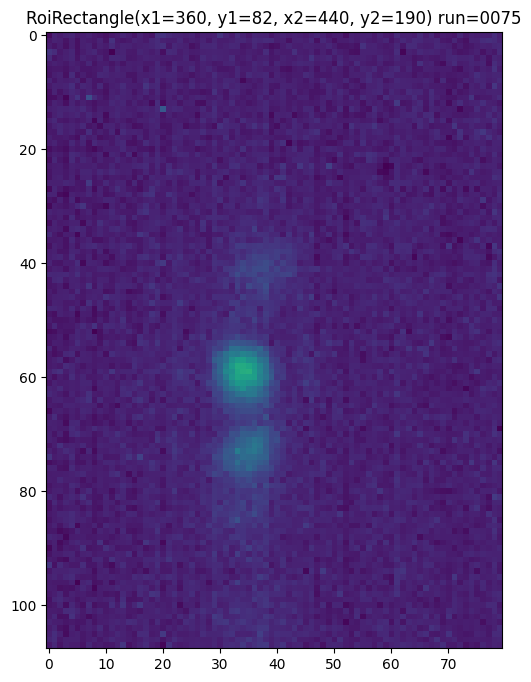

In [27]:
roi_rect = RoiRectangle(360, 82, 440, 190)
roi_images = roi_rect.slice(images)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(np.log1p(roi_images.mean(axis=0)), vmin=0, vmax=1)
ax.set_title(f"{roi_rect} run={run_n:04}");